In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, wavfile
from scipy import signal
from scipy.fft import fft
os.chdir('/Users/letitiaho/src/talker_change_data_processing')

In [2]:
# Load eeg_data
eeg_data = loadmat('1_preprocessing/data/304/eeg_data.mat')['eeg_data']
epoch_num = 120;
eeg = eeg_data[40, :, epoch_num];

In [3]:
# Load audio file
stim = wavfile.read('0_set_up_and_raw_data/data/stim/low_pass_400/churchbells_f.wav')[1]
n_samples = round(len(stim)/44.1)
stim = signal.resample(stim, n_samples)
stim = np.pad(stim, (0, 1600-len(stim)), 'constant')

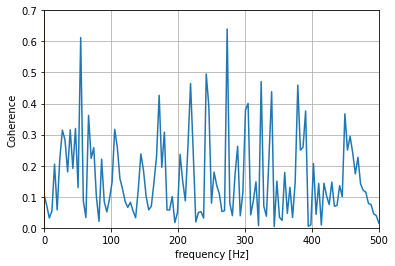

In [5]:
# Coherence with matplotlib
f, Cxy = plt.cohere(stim, eeg, Fs=1000)
plt.plot(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.ylim((0,0.7))
plt.xlim((0,500))
plt.show()

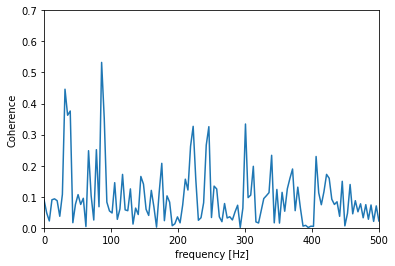

In [7]:
# Coherence with scipy
f, Cxy = signal.coherence(stim, eeg, 1000)
plt.plot(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.ylim((0,0.7))
plt.xlim((0,500))
plt.show()

In [ ]:
# View power spectra for both signals
def plotPowerSpectra(signal, fs):
    y = np.fft.rfft(signal)
    n = len(y)
    power = np.square(np.abs(y))
    f = np.linspace(0, fs/2, len(power))
    plt.plot(f, power)
    plt.xlim((0,500))

plotPowerSpectra(stim, 1000)

In [ ]:
plotPowerSpectra(eeg, 1000)